In [3]:
!pip install nltk wordcloud scikit-learn

import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
df = pd.read_csv('cyberbullying_tweets.csv')
df

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]

In [5]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [7]:
#memeriksa kolom kategroikal
df.describe(include='O')

tweet_text cyberbullying_type
count                      47692              47692
unique                     46017                  6
top     MARINATED IN GATER TEARS           religion
freq                           2               7998

In [8]:
df[df.duplicated(subset='tweet_text')]

tweet_text cyberbullying_type
1758   Our pancakes are selling like hotcakes Shaz - ...  not_cyberbullying
3833   But you all respect him....Pete hasn't read tw...  not_cyberbullying
3939   This is the opportunity to prove ourselves lik...  not_cyberbullying
5684   Strategicscoring should be classed as cheating...  not_cyberbullying
6975   If we're at the bottom of the leaderboard, we'...  not_cyberbullying
...                                                  ...                ...
45718  @SFtheWolf @max2000warlord people confuse empa...          ethnicity
46360  RT @AntonioFrench: I spent the morning at the ...          ethnicity
46556  He can't be a server at our restaurant, that b...          ethnicity
46962  Still, Davis, who is gay, said he pays a socia...          ethnicity
47397  Racism won't stop as long as u stil select ur ...          ethnicity

[1675 rows x 2 columns]

In [9]:
df.duplicated(subset='tweet_text').sum()

np.int64(1675)

In [10]:
#mengecek nilai yang hilang
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [11]:
#menghapus data duplicate di tweet_text
df.drop_duplicates(subset='tweet_text', inplace=True)

In [12]:
df.duplicated(subset='tweet_text').sum()

np.int64(0)

In [13]:
df[df.duplicated()]

Empty DataFrame
Columns: [tweet_text, cyberbullying_type]
Index: []

#Melihat kata yang tidak **relevan**

In [14]:
from collections import Counter
import re

def clean_and_split(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    return words

all_words = []
df['tweet_text'].apply(lambda x: all_words.extend(clean_and_split(x)))

word_freq = Counter(all_words)

# Lihat 100 kata paling sering muncul
word_freq.most_common(100)


[('the', 30513),
 ('i', 25212),
 ('a', 24508),
 ('to', 23025),
 ('and', 21506),
 ('you', 20323),
 ('of', 15141),
 ('in', 14807),
 ('is', 13911),
 ('t', 13091),
 ('that', 12769),
 ('it', 11640),
 ('s', 9761),
 ('are', 9072),
 ('school', 8880),
 ('for', 8538),
 ('me', 7757),
 ('not', 7261),
 ('my', 6690),
 ('this', 6539),
 ('was', 6492),
 ('they', 6394),
 ('but', 6313),
 ('on', 6082),
 ('fuck', 5870),
 ('like', 5835),
 ('who', 5637),
 ('all', 5572),
 ('be', 5426),
 ('dumb', 5389),
 ('with', 5336),
 ('high', 5257),
 ('so', 4999),
 ('about', 4939),
 ('have', 4829),
 ('people', 4826),
 ('bullied', 4703),
 ('as', 4604),
 ('rape', 4512),
 ('just', 4503),
 ('he', 4498),
 ('nigger', 4470),
 ('u', 4367),
 ('your', 4271),
 ('gay', 4237),
 ('rt', 4194),
 ('if', 4170),
 ('can', 3919),
 ('what', 3860),
 ('don', 3792),
 ('bully', 3758),
 ('m', 3699),
 ('at', 3683),
 ('we', 3587),
 ('no', 3543),
 ('or', 3536),
 ('jokes', 3525),
 ('one', 3421),
 ('do', 3354),
 ('when', 3302),
 ('by', 3296),
 ('she', 32

In [15]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

from wordcloud import STOPWORDS
STOPWORDS.update([ 'the', 'i', 'a', 're','to', 'and', 'you', 'of', 'in', 'is', 'it', 'are', 'for',
    'me', 'my', 'this', 'was', 'they', 'but', 'on', 'like', 'who', 'all', 'be',
    'with', 'so', 'about', 'have', 'as', 'just', 'he', 'if', 'can', 'what', 'at','gt', '',
    'we', 'no', 'or', 'one', 'do', 'when', 'by', 'http', 'she', 'up', 'co',
    'from', 'amp', 'get', 'how', 'an', 'her', 'out', 'because', 'now', 'know','http','tayyoung','miley','cyrus','kat','andre',
    'will', 'their', 'why', 'there', 'would', 'think', 'his', 'were', 'has',
    'rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

In [16]:
from collections import Counter
import re

def clean_and_split(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    return words

all_words = []
df['clean_tweet'] = df['tweet_text'].apply(clean_text)  # Buat kolom bersih
df['clean_tweet'].apply(lambda x: all_words.extend(clean_and_split(x)))  # Pakai kolom hasil cleaning
word_freq = Counter(all_words)

# Lihat 100 kata paling sering muncul
word_freq.most_common(100)


[('school', 8864),
 ('fuck', 5882),
 ('dumb', 5390),
 ('high', 5243),
 ('people', 4817),
 ('bullied', 4695),
 ('nigger', 4472),
 ('rape', 4456),
 ('gay', 4191),
 ('bully', 3755),
 ('jokes', 3515),
 ('ass', 2821),
 ('girls', 2811),
 ('black', 2789),
 ('girl', 2771),
 ('muslims', 2513),
 ('muslim', 2490),
 ('white', 2234),
 ('joke', 2072),
 ('bitch', 2070),
 ('idiot', 2043),
 ('right', 1867),
 ('say', 1743),
 ('women', 1712),
 ('got', 1686),
 ('fucking', 1680),
 ('call', 1677),
 ('bullies', 1669),
 ('even', 1635),
 ('go', 1627),
 ('make', 1592),
 ('christian', 1592),
 ('called', 1521),
 ('never', 1514),
 ('woman', 1505),
 ('shit', 1495),
 ('see', 1490),
 ('idiots', 1480),
 ('time', 1461),
 ('still', 1412),
 ('really', 1398),
 ('want', 1388),
 ('islam', 1344),
 ('hate', 1338),
 ('first', 1333),
 ('niggers', 1330),
 ('islamic', 1315),
 ('said', 1304),
 ('bullying', 1284),
 ('obama', 1276),
 ('support', 1270),
 ('man', 1237),
 ('good', 1212),
 ('terrorism', 1195),
 ('us', 1194),
 ('anything

In [17]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
df['clean_tweet'] = df['tweet_text'].apply(clean_text)

In [19]:
df

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

                                             clean_tweet  
0                    words katandandre food crapilicious  
1      aussietv white theblock imacelebrityau today s...  
2                       classy whore red velvet cupcakes  
3      meh p thanks heads concerned another angry dud...  
4      isis account pretending kurdish account islam ...  
...                                                  ...  
47687  black ppl aren expected anything depended anyt...  
47688  turner withhold disappointment turner called c...  
47689  swear god dumb nigger bitch got bleach hair re...  
47690  yea fuck therealexel youre nigger fucking unfo...  
47691  bro gotta chill chillshrammy dog fuck kp dumb ...  

[46017 rows x 3 columns]

In [20]:
from nltk.stem import WordNetLemmatizer

lematizer=WordNetLemmatizer()

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

df['clean_tweet']=df['clean_tweet'].apply(lambda text: lemmatizer_words(text))

In [21]:
df

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

                                             clean_tweet  
0                     word katandandre food crapilicious  
1      aussietv white theblock imacelebrityau today s...  
2                        classy whore red velvet cupcake  
3      meh p thanks head concerned another angry dude...  
4       isi account pretending kurdish account islam lie  
...                                                  ...  
47687  black ppl aren expected anything depended anyt...  
47688  turner withhold disappointment turner called c...  
47689  swear god dumb nigger bitch got bleach hair re...  
47690  yea fuck therealexel youre nigger fucking unfo...  
47691  bro gotta chill chillshrammy dog fuck kp dumb ...  

[46017 rows x 3 columns]

/tmp/ipython-input-22-2278536080.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cyberbullying_counts.index, y=cyberbullying_counts.values, palette='viridis')


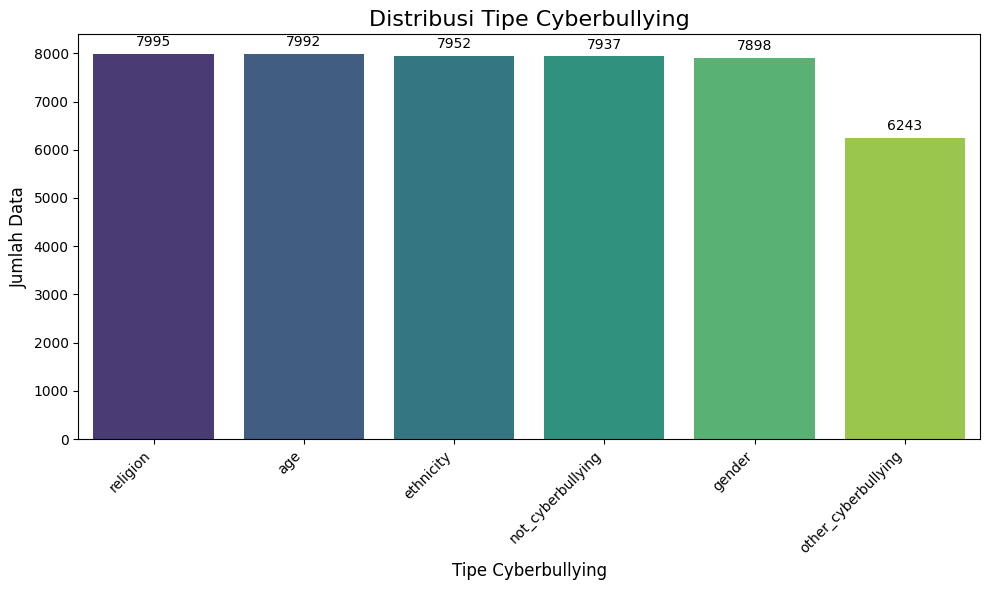

In [22]:
#Melihat distribusi data di setiap kategori
import matplotlib.pyplot as plt
import seaborn as sns

cyberbullying_counts = df['cyberbullying_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cyberbullying_counts.index, y=cyberbullying_counts.values, palette='viridis')

plt.title('Distribusi Tipe Cyberbullying', fontsize=16)
plt.xlabel('Tipe Cyberbullying', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)

plt.xticks(rotation=45, ha='right')

for index, value in enumerate(cyberbullying_counts.values):
    plt.text(index, value + 100, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Dataset memiliki keseimbangan yang relatif baik untuk sebagian besar kategorinya. Lima dari enam kategori, yaitu religion, age, ethnicity, not_cyberbullying, dan gender, memiliki jumlah data yang sangat mirip, berkisar antara 7898 hingga 7995 entri.

Satu kategori menonjol karena jumlah datanya yang lebih rendah, yaitu "other_cyberbullying", dengan hanya sekitar 6243 entri. Hal ini mengisyaratkan bahwa bentuk-bentuk cyberbullying yang tidak terklasifikasi secara spesifik dalam kategori-kategori utama ini lebih jarang ditemukan dalam dataset, atau mungkin representasinya kurang dibandingkan tipe cyberbullying lainnya.

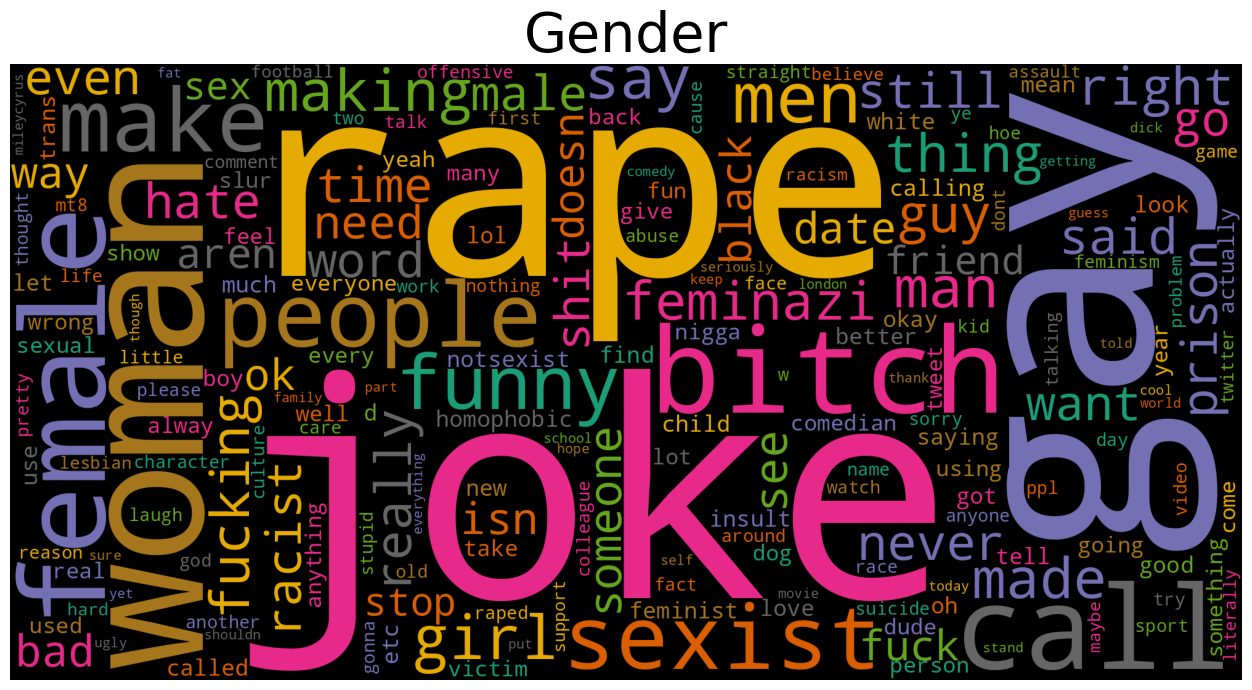

In [23]:
from wordcloud import WordCloud

plt.figure(figsize=(16,8))
subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.clean_tweet.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

In [24]:
import plotly.express as px
unigrams = get_top_n_gram(text_gender,(1,1),10)
bigrams = get_top_n_gram(text_gender,(2,2),10)

# DataFrame Unigram
gender_1 = pd.DataFrame(unigrams, columns=['Text', 'count'])
gender_1_grouped = gender_1.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_uni = px.bar(
    gender_1_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Unigrams',
    labels={'count': 'Count', 'Text': 'Unigram'},
    color_discrete_sequence=['black'],
    width=700,   # Lebar Chart
    height=500   # Tinggi Chart
)

fig_uni.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_uni.show()

# DataFrame Bigrams
gender_2 = pd.DataFrame(bigrams, columns=['Text', 'count'])
gender_2_grouped = gender_2.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_bi = px.bar(
    gender_2_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Bigrams',
    labels={'count': 'Count', 'Text': 'Bigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_bi.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_bi.show()

Analisis unigram, bigram, dan word cloud untuk kategori "gender" secara konsisten mengungkapkan dominasi bahasa yang kasar, merendahkan, dan berkonotasi seksual. Kata-kata seperti "joke", "rape", dan "gay" sering muncul baik secara tunggal maupun berpasangan ("rape joke", "gay joke"), menunjukkan bahwa konten ofensif kerap disamarkan sebagai lelucon. Hal ini mengindikasikan bahwa cyberbullying terkait gender berpusat pada pelecehan seksual dan diskriminasi orientasi seksual, dengan target yang jelas pada individu berdasarkan gender mereka, seringkali menggunakan bahasa misoginis atau diskriminatif.

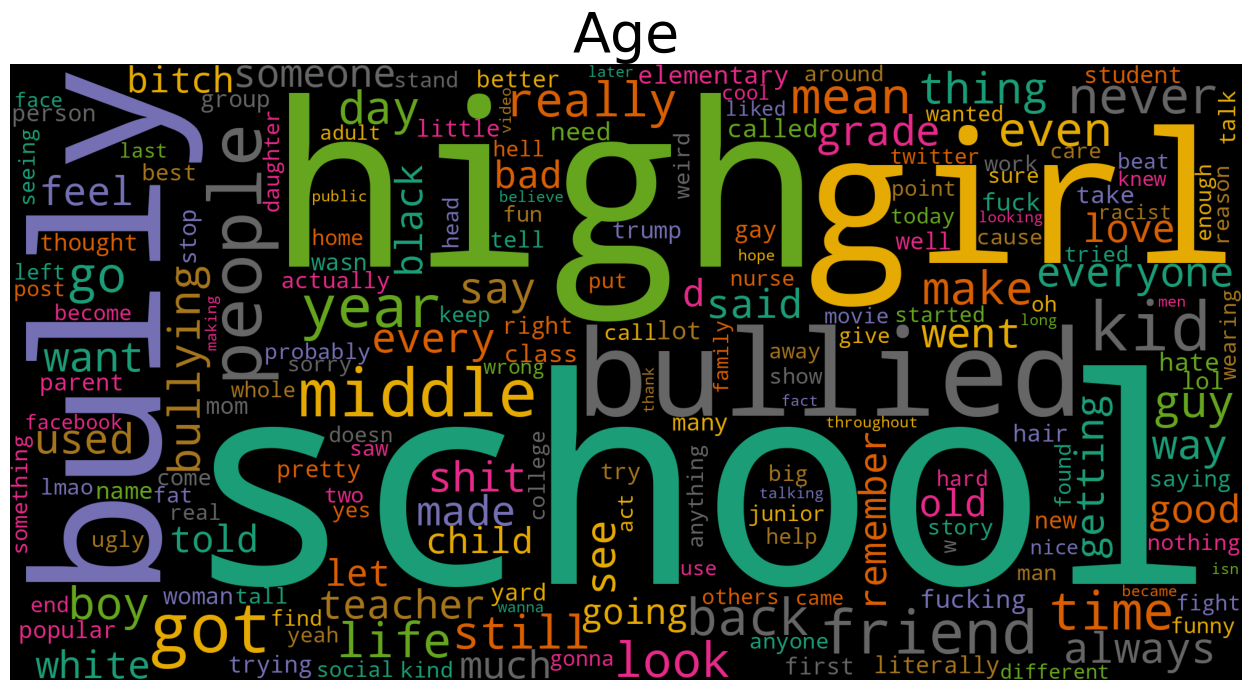

In [25]:
plt.figure(figsize=(16,8))
subset2 = df[df['cyberbullying_type']=='age']
text_age = subset2.clean_tweet.values
cloud2=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud2)

In [26]:
import plotly.express as px
unigrams = get_top_n_gram(text_age,(1,1),10)
bigrams = get_top_n_gram(text_age,(2,2),10)

# DataFrame Unigrams
age_1 = pd.DataFrame(unigrams, columns=['Text', 'count'])
age_1_grouped = age_1.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_uni = px.bar(
    age_1_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Unigrams',
    labels={'count': 'Count', 'Text': 'Unigram'},
    color_discrete_sequence=['black'],
    width=700,   # Lebar Chart
    height=500   # Tinggi Chart
)

fig_uni.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_uni.show()

# DataFrame Bigrams
age_2 = pd.DataFrame(bigrams, columns=['Text', 'count'])
age_2_grouped = age_2.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_bi = px.bar(
    age_2_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Bigrams',
    labels={'count': 'Count', 'Text': 'Bigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_bi.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_bi.show()

untuk kategori "Age"  menunjukkan bahwa cyberbullying terkait usia sangat berpusat pada konteks sekolah dan fase kehidupan remaja/muda. Kata-kata seperti "school", "high", "girl", "bully", "kid", dan "middle" mendominasi frekuensi unigram. Selain itu, bigram seperti "high school", "girl bullied", "bullied high", dan "school bully" menegaskan bahwa pengalaman bullying yang ditargetkan pada usia seringkali terjadi di lingkungan pendidikan, dengan fokus pada dinamika sosial di antara siswa remaja atau anak-anak.

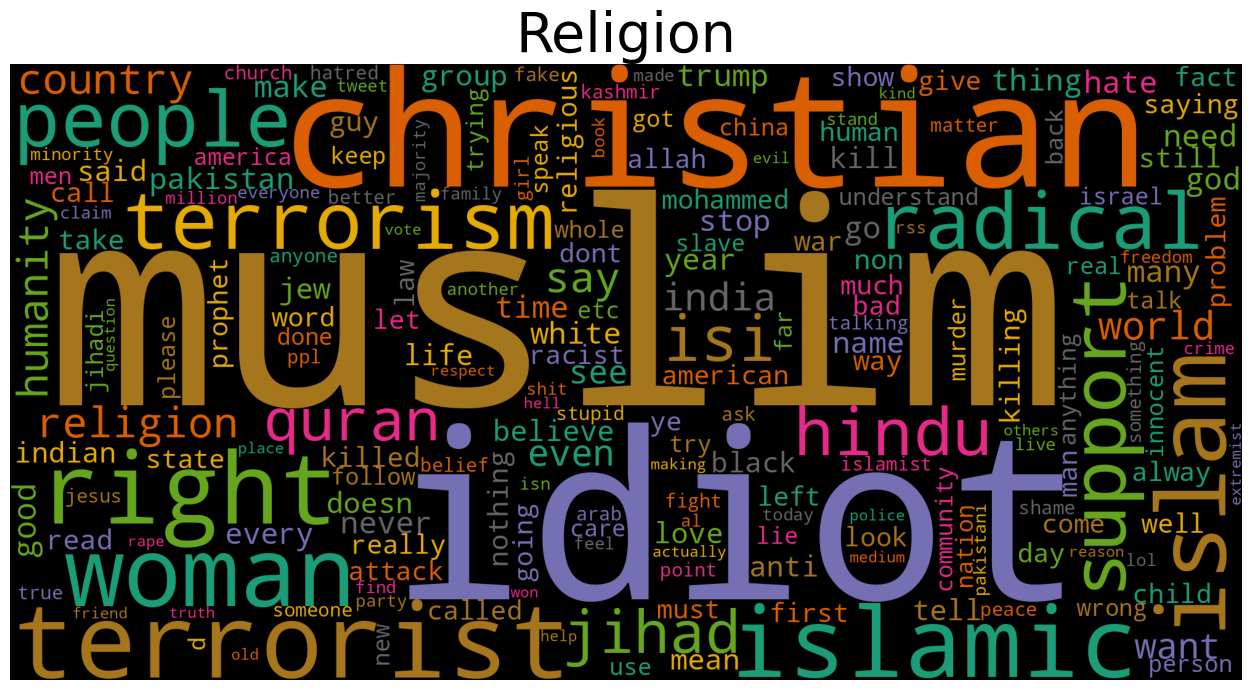

In [27]:
plt.figure(figsize=(16,8))
subset4 = df[df['cyberbullying_type']=='religion']
text_religion = subset4.clean_tweet.values
cloud4=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud4)

In [28]:
import plotly.express as px
unigrams = get_top_n_gram(text_religion,(1,1),10)
bigrams = get_top_n_gram(text_religion,(2,2),10)

# DataFrame Unigrams
religion_1 = pd.DataFrame(unigrams, columns=['Text', 'count'])
religion_1_grouped = religion_1.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_uni = px.bar(
    religion_1_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Unigrams',
    labels={'count': 'Count', 'Text': 'Unigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_uni.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_uni.show()

# DataFrame Bigrams
religion_2 = pd.DataFrame(bigrams, columns=['Text', 'count'])
religion_2_grouped = religion_2.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_bi = px.bar(
    religion_2_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Bigrams',
    labels={'count': 'Count', 'Text': 'Bigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_bi.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_bi.show()

kategori "Religion" secara konsisten mengungkapkan fokus yang kuat pada ujaran kebencian berbasis agama, terutama terhadap Muslim dan Kristen. Kata-kata seperti "muslim", "idiot", "christian", "terrorist",  dan "terrorism" mendominasi unigram, sementara bigram seperti "islamic terrorism", "christian woman", "radical islamic" menunjukkan pola serangan spesifik dan stereotip negatif. Hal ini mengindikasikan bahwa cyberbullying terkait agama seringkali melibatkan penyebaran narasi kebencian, fanatisme, dan asosiasi negatif terhadap kelompok agama tertentu, serta menyoroti isu-isu ekstremisme dan terorisme dalam konteks agama.

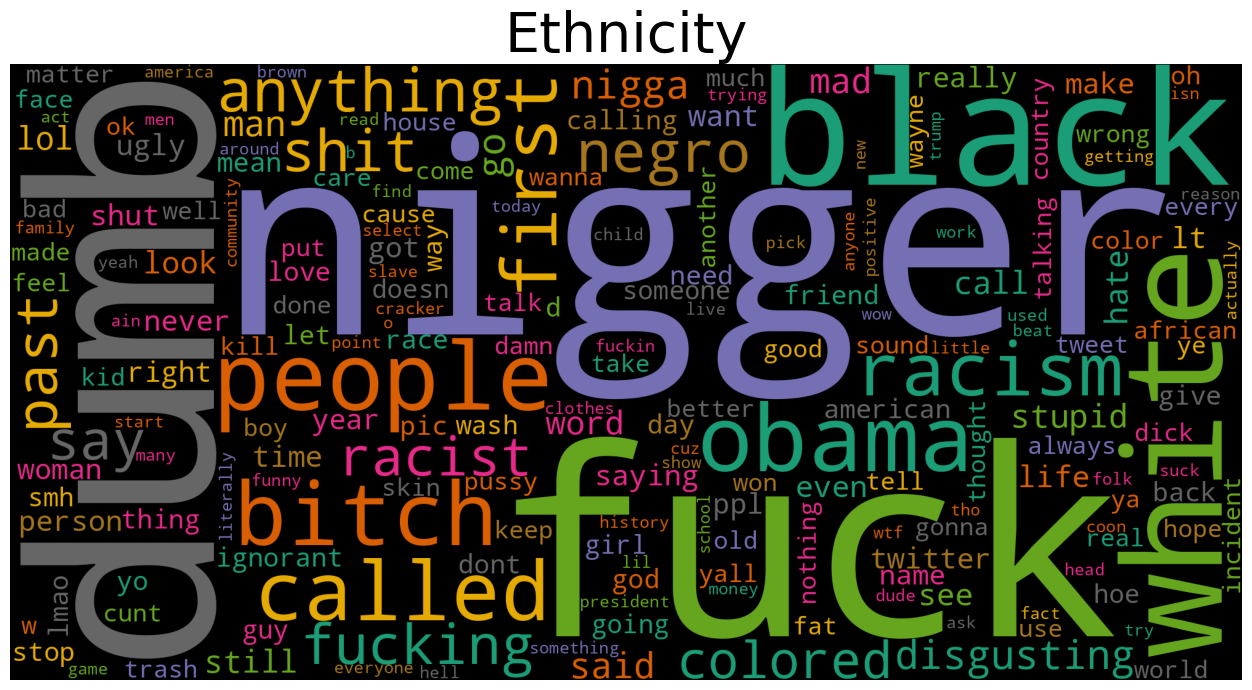

In [29]:
plt.figure(figsize=(16,8))
subset5 = df[df['cyberbullying_type']=='ethnicity']
text_ethnicity = subset5.clean_tweet.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud5)

In [30]:
import plotly.express as px
unigrams = get_top_n_gram(text_ethnicity,(1,1),10)
bigrams = get_top_n_gram(text_ethnicity,(2,2),10)

# DataFrame Unigrams
ethnicity_1 = pd.DataFrame(unigrams, columns=['Text', 'count'])
ethnicity_1_grouped = ethnicity_1.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_uni = px.bar(
    ethnicity_1_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Unigrams',
    labels={'count': 'Count', 'Text': 'Unigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_uni.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_uni.show()

# DataFrame Bigrams
ethnicity_2 = pd.DataFrame(bigrams, columns=['Text', 'count'])
ethnicity_2_grouped = ethnicity_2.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_bi = px.bar(
    ethnicity_2_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Bigrams',
    labels={'count': 'Count', 'Text': 'Bigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_bi.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_bi.show()

word cloud serta daftar unigram dan bigram untuk kategori "Ethnicity" dengan jelas menunjukkan bahwa cyberbullying di sini didominasi oleh bahasa rasial yang sangat ofensif dan merendahkan. Kehadiran kata-kata seperti "nigger", "fuck", dan "dumb" di unigram teratas, serta kombinasi seperti "dumb nigger" dan "fuck obama" di bigram, secara tegas mengindikasikan bahwa inti dari cyberbullying ini adalah serangan langsung dan vulgar yang menargetkan individu atau kelompok berdasarkan ras atau etnis mereka.

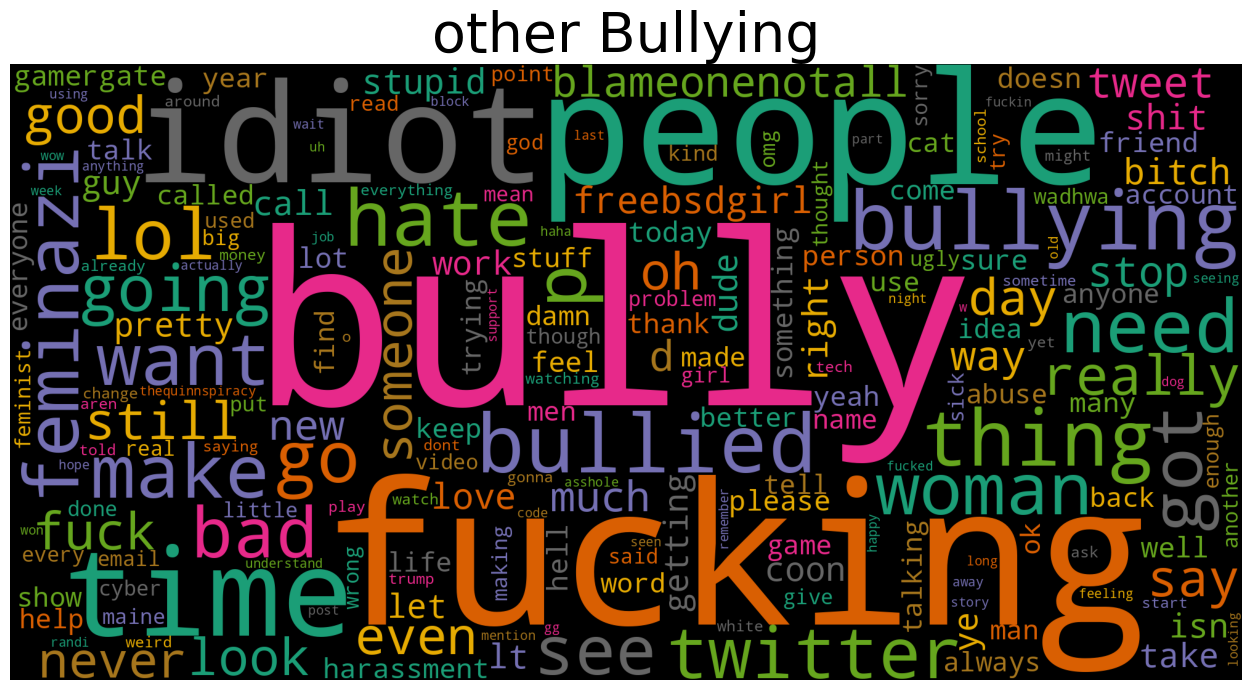

In [31]:
plt.figure(figsize=(16,8))
subset7 = df[df['cyberbullying_type']=='other_cyberbullying']
text_other_cyberbullying = subset7.clean_tweet.values
cloud7=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_other_cyberbullying))

plt.axis('off')
plt.title("other Bullying",fontsize=40)
plt.imshow(cloud7)

In [32]:
import plotly.express as px
unigrams = get_top_n_gram(text_other_cyberbullying,(1,1),10)
bigrams = get_top_n_gram(text_other_cyberbullying,(2,2),10)

# DataFrame Unigrams
other_cyber_1 = pd.DataFrame(unigrams, columns=['Text', 'count'])
other_cyber_1_grouped = other_cyber_1.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_uni = px.bar(
    other_cyber_1_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Unigrams',
    labels={'count': 'Count', 'Text': 'Unigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_uni.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_uni.show()
# DataFrame Bigrams
other_cyber_2 = pd.DataFrame(bigrams, columns=['Text', 'count'])
other_cyber_2_grouped = other_cyber_2.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_bi = px.bar(
    other_cyber_2_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Bigrams',
    labels={'count': 'Count', 'Text': 'Bigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_bi.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_bi.show()

kategori ini didominasi oleh bahasa yang sangat negatif, vulgar, dan secara eksplisit terkait dengan tindakan bullying itu sendiri. Kata-kata seperti "bully", "fucking", "people", "idiot", "bullying", dan "bullied" secara konsisten muncul di frekuensi tertinggi. Bigram seperti "fucking hate", "stop bullying", "cyber bully", dan "fucking idiot" lebih lanjut menegaskan bahwa tweet dalam kategori ini secara langsung membahas perasaan kebencian, tindakan bullying  dan penggunaan umpatan yang kuat.

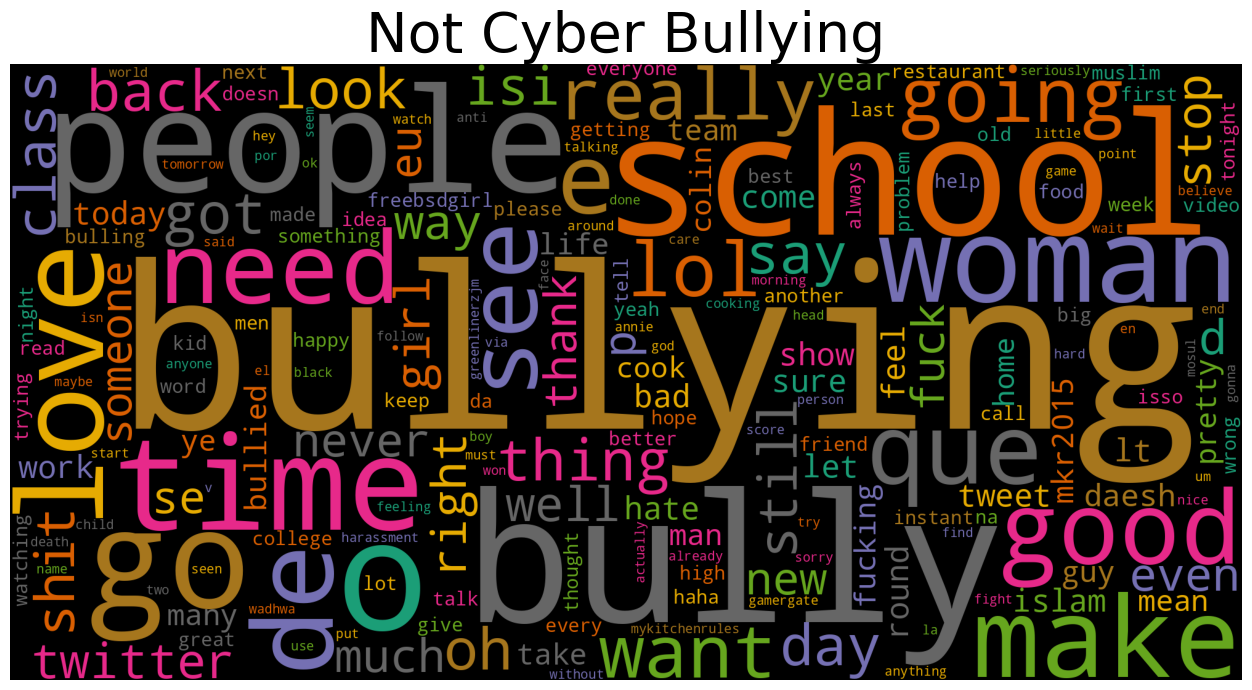

In [33]:
plt.figure(figsize=(16,8))
subset8 = df[df['cyberbullying_type']=='not_cyberbullying']
text_not_cyberbullying = subset8.clean_tweet.values
cloud8=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_not_cyberbullying))

plt.axis('off')
plt.title("Not Cyber Bullying",fontsize=40)
plt.imshow(cloud8)

In [34]:
import plotly.express as px
unigrams = get_top_n_gram(text_not_cyberbullying,(1,1),10)
bigrams = get_top_n_gram(text_not_cyberbullying,(2,2),10)

# DataFrame Unigrams
not_cyberbullying_1 = pd.DataFrame(unigrams, columns=['Text', 'count'])
not_cyberbullying_1_grouped = not_cyberbullying_1.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_uni = px.bar(
    not_cyberbullying_1_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Unigrams',
    labels={'count': 'Count', 'Text': 'Unigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_uni.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_uni.show()

# DataFrame Bigrams
not_cyberbullying_2 = pd.DataFrame(bigrams, columns=['Text', 'count'])
not_cyberbullying_2_grouped = not_cyberbullying_2.groupby('Text').sum().reset_index().sort_values('count', ascending=True)

fig_bi = px.bar(
    not_cyberbullying_2_grouped,
    x='count',
    y='Text',
    orientation='h',
    title='Top 10 Bigrams',
    labels={'count': 'Count', 'Text': 'Bigram'},
    color_discrete_sequence=['black'],
    width=700,
    height=500
)

fig_bi.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

fig_bi.show()

"Not Cyberbullying" menunjukkan bahwa meskipun diklasifikasikan bukan sebagai cyberbullying, terdapat penggunaan kata-kata terkait bullying dan sekolah yang cukup menonjol. Kata-kata seperti "bullying", "bully", dan "school" muncul di antara unigram teratas, sementara bigram seperti "stop bullying" juga terlihat. Hal ini mengindikasikan bahwa tweet dalam kategori ini mungkin membahas bullying atau pengalaman di sekolah dalam konteks netral, observasi, dukungan anti-bullying, atau sekadar penggunaan kata tersebut tanpa maksud melecehkan. Kontras dengan kategori cyberbullying lainnya, tweet di sini tidak didominasi oleh bahasa vulgar atau merendahkan yang eksplisit, melainkan cenderung membahas topik bullying secara umum atau di lingkungan tertentu tanpa intensi negatif.

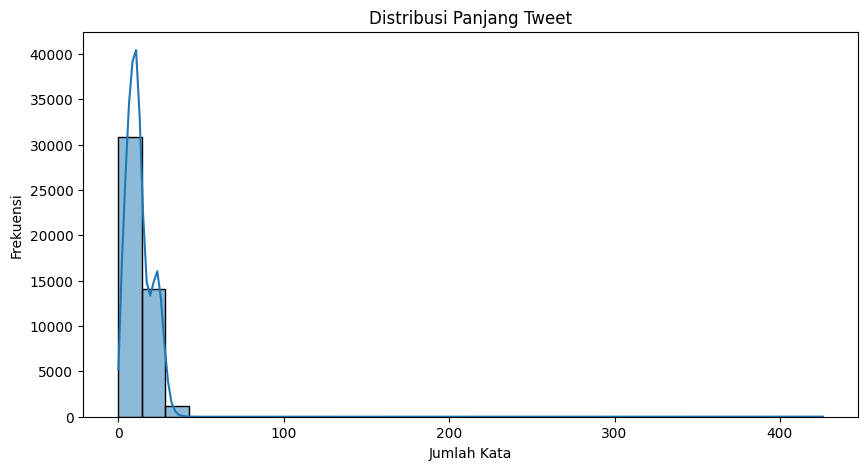

In [35]:
# Panjang tweet
df['text_length'] = df['clean_tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribusi Panjang Tweet")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()

Visualisasi histogram dan KDE plot menunjukkan bahwa mayoritas tweet dalam dataset memiliki panjang yang sangat pendek, dengan frekuensi tertinggi berada pada tweet yang terdiri dari sekitar 5 hingga 20 kata. Distribusi ini sangat miring ke kanan (right-skewed), mengindikasikan bahwa sementara ada konsentrasi tinggi tweet ringkas, jumlah tweet akan menurun drastis seiring bertambahnya jumlah kata.

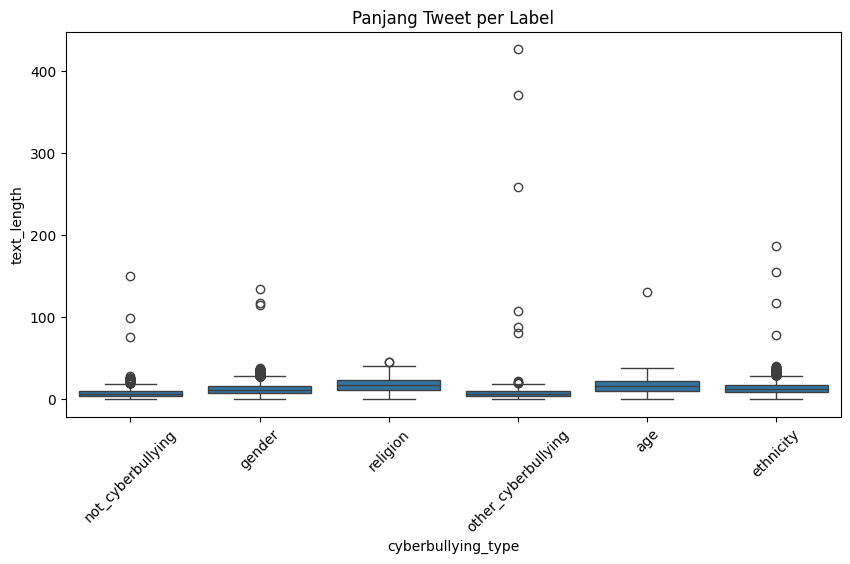

In [36]:
# Panjang per label
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='cyberbullying_type', y='text_length')
plt.title('Panjang Tweet per Label')
plt.xticks(rotation=45)
plt.show()

Visualisasi ini menunjukkan bahwa panjang tweet cenderung sangat pendek dan konsisten di semua kategori cyberbullying maupun yang bukan cyberbullying, dengan sebagian besar data berada di bawah 20 kata. Namun, terdapat outlier berupa tweet yang sangat panjang di setiap kategori, terutama pada "other_cyberbullying" yang mencapai panjang ekstrem

In [37]:
def show_top_ngrams(label, ngram_range=(2,2), top_n=10):
    subset = df[df['cyberbullying_type'] == label]['clean_tweet']
    if subset.empty:
        print(f"\nTidak ada data untuk label '{label}'")
        return
    vec = CountVectorizer(ngram_range=ngram_range).fit(subset)
    bag = vec.transform(subset)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    print(f"\nTop {top_n} ngrams untuk label '{label}':")
    for phrase, freq in words_freq[:top_n]:
        print(f"{phrase}: {freq}")

# Jalankan
for label in df['cyberbullying_type'].unique():
    show_top_ngrams(label, (2,2), 10)  # Bigram



Top 10 ngrams untuk label 'not_cyberbullying':
instant restaurant: 48
bullying se: 35
high school: 33
isso bullying: 31
de bullying: 31
katie nikki: 27
di bully: 26
annie lloyd: 25
anti bullying: 22
lemon tart: 22

Top 10 ngrams untuk label 'gender':
rape joke: 2259
gay joke: 810
joke gay: 517
gay rape: 474
joke rape: 465
rape gay: 266
call female: 239
gay people: 234
make rape: 189
prison rape: 189

Top 10 ngrams untuk label 'religion':
islamic terrorism: 878
christian woman: 836
radical islamic: 215
muslim idiot: 165
non muslim: 140
muslim country: 135
radical christian: 118
support radical: 117
christian support: 111
muslim terrorist: 109

Top 10 ngrams untuk label 'other_cyberbullying':
fucking hate: 31
stop bullying: 28
maine coon: 28
bully lol: 24
cyber bully: 24
got bullied: 23
instant restaurant: 20
ugly as: 20
fucking idiot: 20
oh god: 19

Top 10 ngrams untuk label 'age':
high school: 4666
girl bullied: 1468
bullied high: 1352
school bully: 1246
middle school: 603
girl high: 

In [38]:
X = df['clean_tweet']
y = df['cyberbullying_type']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [39]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


🔹 Logistic Regression
Best Params: {'C': 1}
Train Accuracy: 0.8779 | Test Accuracy: 0.8331

Classification Report (Test):
                     precision    recall  f1-score   support

                age       0.92      0.98      0.95      1599
          ethnicity       0.96      0.97      0.97      1590
             gender       0.91      0.84      0.87      1580
  not_cyberbullying       0.60      0.67      0.63      1587
other_cyberbullying       0.59      0.52      0.55      1249
           religion       0.96      0.95      0.95      1599

           accuracy                           0.83      9204
          macro avg       0.82      0.82      0.82      9204
       weighted avg       0.83      0.83      0.83      9204



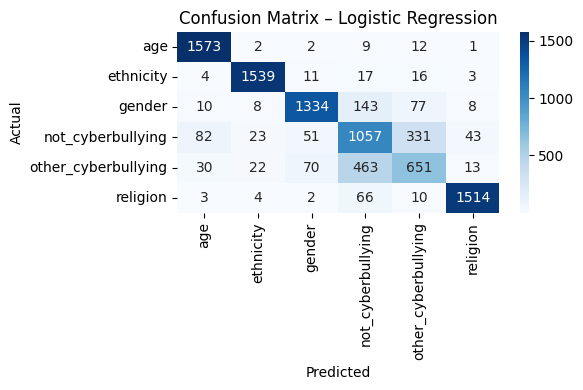


🔹 Naive Bayes
Best Params: {'alpha': 1}
Train Accuracy: 0.8085 | Test Accuracy: 0.7597

Classification Report (Test):
                     precision    recall  f1-score   support

                age       0.76      0.97      0.85      1599
          ethnicity       0.85      0.91      0.88      1590
             gender       0.82      0.82      0.82      1580
  not_cyberbullying       0.62      0.46      0.53      1587
other_cyberbullying       0.60      0.37      0.46      1249
           religion       0.78      0.95      0.86      1599

           accuracy                           0.76      9204
          macro avg       0.74      0.75      0.73      9204
       weighted avg       0.74      0.76      0.74      9204



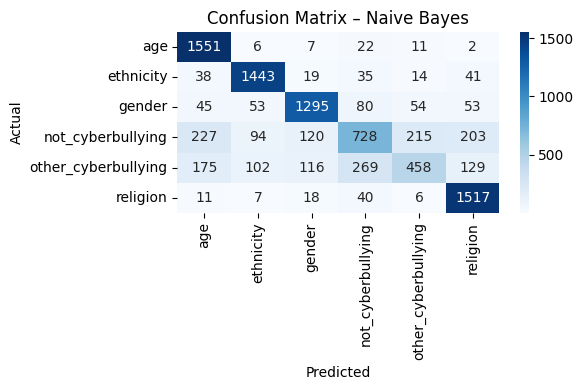


🔹 SVM
Best Params: {'C': 0.1}
Train Accuracy: 0.8813 | Test Accuracy: 0.8365

Classification Report (Test):
                     precision    recall  f1-score   support

                age       0.93      0.99      0.96      1599
          ethnicity       0.96      0.97      0.97      1590
             gender       0.91      0.84      0.87      1580
  not_cyberbullying       0.61      0.66      0.63      1587
other_cyberbullying       0.60      0.53      0.56      1249
           religion       0.96      0.95      0.95      1599

           accuracy                           0.84      9204
          macro avg       0.83      0.83      0.83      9204
       weighted avg       0.84      0.84      0.84      9204



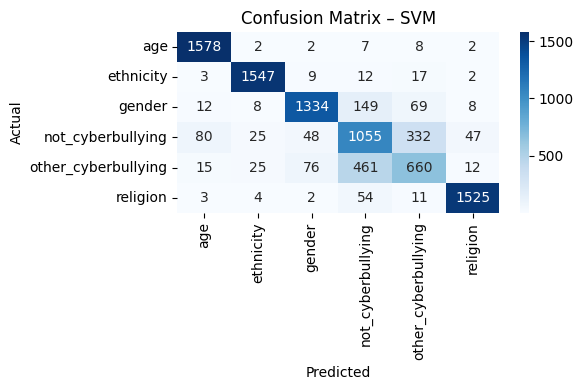


📊 Model Performance Summary:
                 Model   Best Params  Train Accuracy  Test Accuracy
2                  SVM    {'C': 0.1}        0.881292       0.836484
0  Logistic Regression      {'C': 1}        0.877896       0.833116
1          Naive Bayes  {'alpha': 1}        0.808492       0.759670


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model Configurations
model_configs = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, solver='liblinear'),
        'params': {'C': [0.1, 1, 10]}
    },
    'Naive Bayes': {
        'model': MultinomialNB(),
        'params': {'alpha': [0.01, 0.1, 1, 10]}
    },
    'SVM': {
        'model': LinearSVC(max_iter=2000),
        'params': {'C': [0.1, 1, 10]}
    }
}

# Results Collector
results = []

# Model Loop + Evaluation
for name, config in model_configs.items():
    print(f"\n🔹 {name}")

    grid = GridSearchCV(
        config['model'],
        config['params'],
        cv=3,
        scoring='f1_macro',
        n_jobs=-1
    )
    grid.fit(X_train_tfidf, y_train)
    best_model = grid.best_estimator_

    y_train_pred = best_model.predict(X_train_tfidf)
    y_test_pred = best_model.predict(X_test_tfidf)

    train_acc = best_model.score(X_train_tfidf, y_train)
    test_acc = best_model.score(X_test_tfidf, y_test)

    print(f"Best Params: {grid.best_params_}")
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        confusion_matrix(y_test, y_test_pred),
        annot=True, fmt='d', cmap='Blues',
        xticklabels=le.classes_, yticklabels=le.classes_
    )
    plt.title(f'Confusion Matrix – {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    plt.close()

    # Append result
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })

# Summary of All Models
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary:")
print(results_df.sort_values(by='Test Accuracy', ascending=False))


#Ringkasan

Berdasarkan hasil evaluasi komprehensif, kami menyimpulkan bahwa Support Vector Machine (SVM) Linier adalah model terbaik untuk tugas klasifikasi cyberbullying ini.
Kinerja Keseluruhan Terbaik: SVM Linier mencapai Akurasi Uji tertinggi sebesar 83.65%, mengungguli Regresi Logistik (83.31%) dan Naive Bayes (75.97%). Akurasi pelatihan SVM juga menunjukkan keseimbangan yang baik (88.13%), mengindikasikan kemampuan belajar yang kuat tanpa overfitting yang signifikan.
Kekuatan dalam Kelas Utama: Model SVM menunjukkan precision, recall, dan f1-score yang sangat tinggi (di atas 0.95) untuk kategori age, ethnicity, dan religion, mengindikasikan kemampuan klasifikasi yang sangat akurat untuk jenis cyberbullying berbasis demografi dan keyakinan.

Tantangan pada Kelas Minoritas/Tumpang Tindih: Meskipun secara keseluruhan kuat, SVM, dan juga model lainnya, masih menghadapi tantangan dalam mengklasifikasikan kategori not_cyberbullying dan other_cyberbullying. Kedua kelas ini memiliki skor F1 yang lebih rendah (sekitar 0.63 dan 0.55 untuk SVM), menunjukkan adanya kebingungan atau tumpang tindih dalam karakteristik teks di antara mereka dan dengan kategori cyberbullying lainnya. Ini adalah area potensial untuk peningkatan di masa depan.
Secara keseluruhan, kinerja superior SVM, terutama dalam akurasi dan kemampuan klasifikasi kategori-kategori kunci, menjadikannya pilihan paling optimal untuk penerapan dalam sistem deteksi cyberbullying ini.

In [41]:
# Menyimpan model terbaik (SVM) dan LabelEncoder
best_model = grid.best_estimator_
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model, LabelEncoder, and TfidfVectorizer saved successfully.")



Model, LabelEncoder, and TfidfVectorizer saved successfully.


In [42]:
from google.colab import files
files.download('best_svm_model.pkl')
files.download('label_encoder.pkl')
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>